In [1]:
import os
from random import choice, seed
import matplotlib.pyplot as plt 
import numpy as np
from naive_parsing import *
from typing import List, Tuple

folder_name = "./../data/input/scripts_imsdb"
screenplay_name = choice(os.listdir(folder_name))
script_path = os.path.join(folder_name, screenplay_name)

In [3]:
def tag_script_modified_to_study_results(script_path: str, extract = False) -> Tuple[List[List[str]], List[label]]:
    """Assign a label to each line of a script.

    Args:
        script_path (str): path of the script

    Returns:
        Tuple[List[List[str]], List[label]]: First element of the tuple is
            a list of scenes, each scene being a list of lines. The second
            element returned is the list of labels for each line.
    """
    with open(script_path) as f:
        screenplay = f.read()

    lines = screenplay.split("\n")
    scenes = find_scenes(lines)

    indents = get_indents_list(lines)
    plt.hist(indents, bins = max(indents) + 1, log=True)
    plt.show()
    # We remove the first and last scenes (which often contain the title of
    # the movie etc.), then we assign a label to each indent level
    if len(scenes) > 2:
        middle_indents = indents[len(scenes[0]) : -len(scenes[-1])]
        middle_lines = sum(scenes[1:-1], [])
    else:
        middle_indents = indents
        middle_lines = lines

    characterized_indent_levels = characterize_indent_levels(
        middle_lines, middle_indents, print_details=True
    )
    tags = []
    for scene in scenes:
        tags.append(tag_lines(scene, characterized_indent_levels))

    if extract : 
        print_extract_of_each_indent_level(characterized_indent_levels, middle_lines, middle_indents)

    return lines, characterized_indent_levels, indents

def print_extract_of_each_indent_level(characterized_indent_levels, lines, indents, length=6):
    for key, value in characterized_indent_levels.items():
        if value != label.EMPTY_LINE:
            print(f"\n****** {value.name} | {key} ******")
            lines_idxs = np.where(np.array(indents) ==key)[0]
            for i in range(min(length, len(lines_idxs))):
                print(lines[lines_idxs[i]])


Big-Lebowski,-The.txt


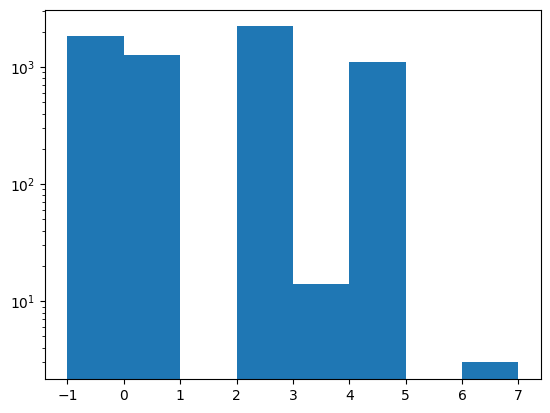

In : [   -1,     0,     4,     2,     3,     7,     6, ]
Re : [    E,     D,     C,     D,     M,     S,     S, ]
Le : [  0.0, 40.81,  5.46, 27.26,  9.92,  31.0,  34.0, ]
Nb : [ 1315,   948,   778,  1520,    12,     1,     1, ]
Ca : [    0,  0.08,   1.0,   0.1,  0.02,   1.0,   1.0, ]
Ch : [    0,     0,     0,     0,     0,     0,     0, ]
SB : [    0,     0,     0,     0,     0,     0,     0, ]
SE : [    0,     4,     0,     0,     0,     1,     1, ]
Me : [    0,     0,     0,     0,    12,     0,     0, ]
Di : [    0,     1,     0,   238,     0,     0,     0, ]

****** DIALOGUE | 0 ******
Displaying great slow-motion form as the Dude and Walter's 
conversation continues over.
FLASHBACK
We see Quintana, in pressed jeans and a stretchy sweater,  
walking up a stoop in a residential neighborhood and zinging 
the bell.

****** CHARACTER | 4 ******
				WALTER
				DUDE
				WALTER
				DUDE
				WALTER
				DONNY

****** DIALOGUE | 2 ******
		Yeah, but he's a fucking pervert, 
		Dude.
		Huh?
	

In [7]:
print(screenplay_name)
lines, characterized_indent_levels, indents = tag_script_modified_to_study_results(script_path, extract = True)

In [ ]:
i = 11
print_extract_of_each_indent_level({i:characterized_indent_levels[i]}, lines, indents, length=10000)